This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [13]:
np.zeros((len(train_images), 784)).shape

(60000, 784)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_train = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2918 - accuracy: 0.9147 - val_loss: 0.1647 - val_accuracy: 0.9517
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1233 - accuracy: 0.9640 - val_loss: 0.1096 - val_accuracy: 0.9675
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9763 - val_loss: 0.0899 - val_accuracy: 0.9742
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0588 - accuracy: 0.9828 - val_loss: 0.0811 - val_accuracy: 0.9750
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0435 - accuracy: 0.9874 - val_loss: 0.0794 - val_accuracy: 0.9766
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0791 - val_accuracy: 0.9767
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0251 - accuracy: 0.9927 - val_loss: 0.0778 - val_accuracy: 0.9776
Epoch 

InvalidArgumentError: ignored

**Plotting a validation accuracy comparison**

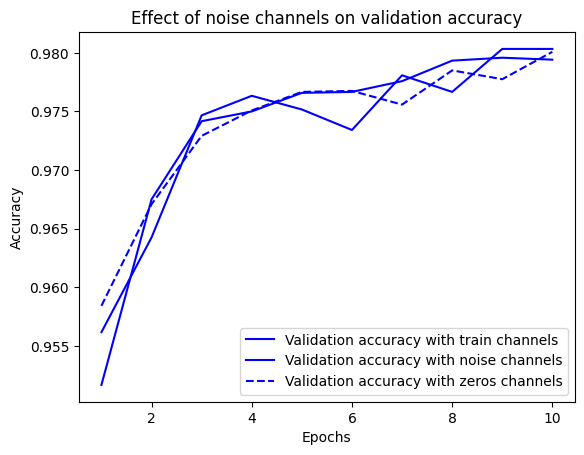

In [22]:
import matplotlib.pyplot as plt
val_acc_train = history_train.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_train, "b-",
         label="Validation accuracy with train channels")
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [35]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels) #shuffle

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3149 - accuracy: 0.1044 - val_loss: 2.3100 - val_accuracy: 0.1028
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3002 - accuracy: 0.1152 - val_loss: 2.3126 - val_accuracy: 0.0996
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2928 - accuracy: 0.1262 - val_loss: 2.3140 - val_accuracy: 0.1007
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2820 - accuracy: 0.1365 - val_loss: 2.3227 - val_accuracy: 0.1013
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2658 - accuracy: 0.1480 - val_loss: 2.3311 - val_accuracy: 0.1007
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2468 - accuracy: 0.1640 - val_loss: 2.3463 - val_accuracy: 0.1037
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2234 - accuracy: 0.1777 - val_loss: 2.3574 - val_accuracy: 0.1031

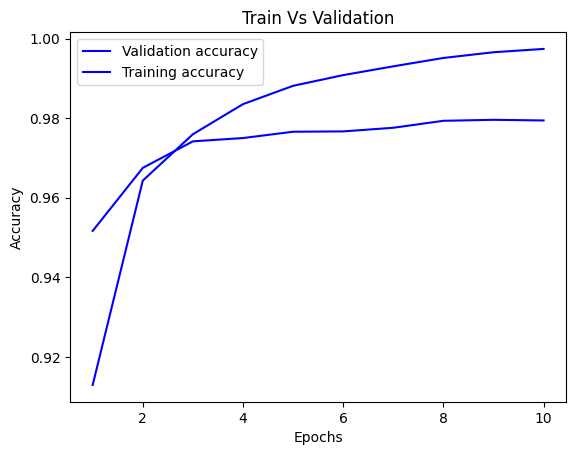

In [37]:
import matplotlib.pyplot as plt
val_acc_train = history_train.history["val_accuracy"]
val_acc_noise = history_noise.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_train, "b-",
         label="Validation accuracy")
plt.plot(epochs, val_acc_noise, "b-",
         label="Training accuracy")
plt.title("Train Vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [16]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 573.1983 - accuracy: 0.2808 - val_loss: 2.4981 - val_accuracy: 0.2417
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7109 - accuracy: 0.2126 - val_loss: 2.1244 - val_accuracy: 0.2533
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6174 - accuracy: 0.2196 - val_loss: 2.2115 - val_accuracy: 0.2246
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6924 - accuracy: 0.2181 - val_loss: 2.1886 - val_accuracy: 0.2320
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4113 - accuracy: 0.2200 - val_loss: 2.1743 - val_accuracy: 0.2344
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4463 - accuracy: 0.2204 - val_loss: 2.1386 - val_accuracy: 0.2462
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3572 - accuracy: 0.2276 - val_loss: 2.2058 - val_accuracy: 0.2388
Epoc

**The same model with a more appropriate learning rate**

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3438 - accuracy: 0.9105 - val_loss: 0.2032 - val_accuracy: 0.9449
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1278 - accuracy: 0.9643 - val_loss: 0.1281 - val_accuracy: 0.9681
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.9746 - val_loss: 0.1270 - val_accuracy: 0.9715
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9785 - val_loss: 0.1586 - val_accuracy: 0.9720
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0668 - accuracy: 0.9830 - val_loss: 0.1467 - val_accuracy: 0.9728
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0540 - accuracy: 0.9855 - val_loss: 0.1930 - val_accuracy: 0.9688
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9877 - val_loss: 0.1862 - val_accuracy: 0.9702
Epoch 

20.085536923187668
7.38905609893065
2.718281828459045
1.0
0.36787944117144233
0.1353352832366127
0.049787068367863944
0.01831563888873418
0.006737946999085467
0.0024787521766663585
0.0009118819655545162
0.00033546262790251185
0.00012340980408667956
4.5399929762484854e-05
1.670170079024566e-05
6.14421235332821e-06


In [54]:
import math
histories = []
for i in range(-3,3):
    alpha = math.exp(-1*i)
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(alpha),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
    histories.append(model.fit(train_images, train_labels,
            epochs=20,
            batch_size=128,
            validation_split=0.2)
    )

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 132297.2188 - accuracy: 0.0997 - val_loss: 22.1943 - val_accuracy: 0.0989
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 25.9940 - accuracy: 0.0991 - val_loss: 32.1000 - val_accuracy: 0.0997
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 25.1175 - accuracy: 0.0997 - val_loss: 25.7983 - val_accuracy: 0.0968
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 24.9954 - accuracy: 0.0984 - val_loss: 14.0229 - val_accuracy: 0.0997
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 25.1968 - accuracy: 0.1018 - val_loss: 34.9550 - val_accuracy: 0.0969
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 25.1527 - accuracy: 0.0992 - val_loss: 25.9229 - val_accuracy: 0.1026
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 24.7175 - accuracy: 0.0995 - val_loss: 18.1969 - val_accur

ValueError: ignored

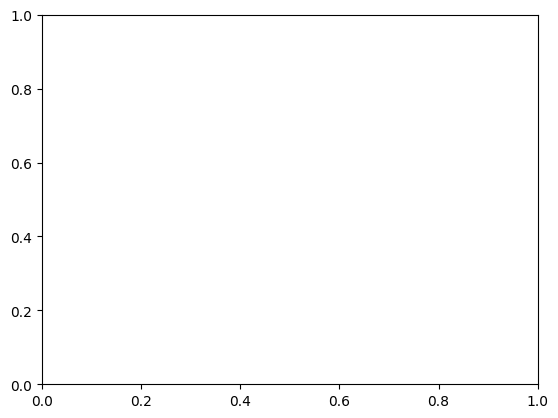

In [55]:
import matplotlib.pyplot as plt
for i in range(len(range(-3,3))):
    alpha = math.exp(-1*i)
    val_acc = histories[i].history["accuracy"]
    epochs = range(1, 21)
    plt.plot(epochs, val_acc,
            label=f"Validation_accuracy_lr_{alpha}")
plt.title("Train Vs Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [17]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6667 - accuracy: 0.8360 - val_loss: 0.3576 - val_accuracy: 0.9032
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3523 - accuracy: 0.9038 - val_loss: 0.3081 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3169 - accuracy: 0.9118 - val_loss: 0.2934 - val_accuracy: 0.9188
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.9165 - val_loss: 0.2834 - val_accuracy: 0.9209
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2916 - accuracy: 0.9187 - val_loss: 0.2780 - val_accuracy: 0.9221
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2851 - accuracy: 0.9202 - val_loss: 0.2732 - val_accuracy: 0.9251
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2803 - accuracy: 0.9221 - val_loss: 0.2720 - val_accuracy: 0.9251
Epoch 

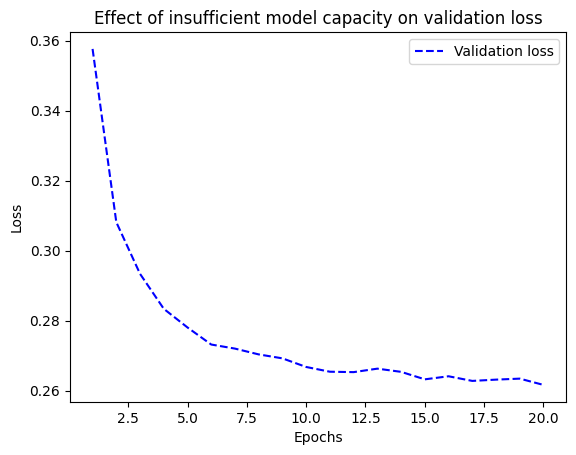

In [18]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [19]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3647 - accuracy: 0.8958 - val_loss: 0.1874 - val_accuracy: 0.9487
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1615 - accuracy: 0.9520 - val_loss: 0.1375 - val_accuracy: 0.9602
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1129 - accuracy: 0.9666 - val_loss: 0.1172 - val_accuracy: 0.9657
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9735 - val_loss: 0.1054 - val_accuracy: 0.9674
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9792 - val_loss: 0.0950 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0943 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.1019 - val_accuracy: 0.9715
Epoch 

In [ ]:
import matplotlib.pyplot as plt
val_acc_train = history_train.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_train, "b-",
         label="Validation accuracy with train channels")
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [56]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5339 - accuracy: 0.7892 - val_loss: 0.4156 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3359 - accuracy: 0.8903 - val_loss: 0.3173 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2531 - accuracy: 0.9161 - val_loss: 0.2933 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2057 - accuracy: 0.9319 - val_loss: 0.2785 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1725 - accuracy: 0.9429 - val_loss: 0.2744 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1484 - accuracy: 0.9521 - val_loss: 0.2799 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1272 - accurac

**Version of the model with lower capacity**

In [57]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6061 - accuracy: 0.6425 - val_loss: 0.5409 - val_accuracy: 0.7296
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5070 - accuracy: 0.7965 - val_loss: 0.5114 - val_accuracy: 0.7577
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4620 - accuracy: 0.8607 - val_loss: 0.4798 - val_accuracy: 0.8251
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4298 - accuracy: 0.8975 - val_loss: 0.4613 - val_accuracy: 0.8649
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4062 - accuracy: 0.9199 - val_loss: 0.4632 - val_accuracy: 0.8499
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3853 - accuracy: 0.9338 - val_loss: 0.4447 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3669 - accuracy: 0.9489 - val_loss: 0.4451 - val_accuracy: 0.8767
Epoch 8/20
30

**Version of the model with higher capacity**

In [58]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5786 - accuracy: 0.7115 - val_loss: 0.4121 - val_accuracy: 0.8158
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3281 - accuracy: 0.8635 - val_loss: 0.3283 - val_accuracy: 0.8636
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2422 - accuracy: 0.9034 - val_loss: 0.3476 - val_accuracy: 0.8559
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1823 - accuracy: 0.9287 - val_loss: 0.2724 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1381 - accuracy: 0.9486 - val_loss: 0.2867 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1061 - accuracy: 0.9641 - val_loss: 0.4357 - val_accuracy: 0.8335
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0820 - accuracy: 0.9709 - val_loss: 0.3198 - val_accuracy: 0.8875
Epoch 8/20
30

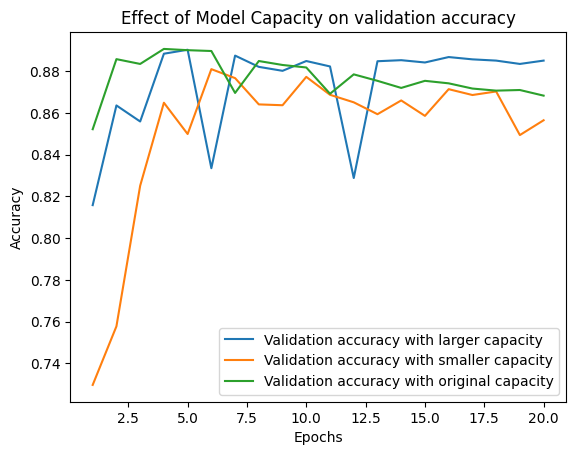

In [65]:
import matplotlib.pyplot as plt
val_acc_larger = history_larger_model.history["val_accuracy"]
val_acc_smaller = history_smaller_model.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_larger,
         label="Validation accuracy with larger capacity")
plt.plot(epochs, val_acc_smaller,
         label="Validation accuracy with smaller capacity")
plt.plot(epochs, val_acc_original,
         label="Validation accuracy with original capacity")
plt.title("Effect of Model Capacity on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [66]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history__without_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5602 - accuracy: 0.7619 - val_loss: 0.4305 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3591 - accuracy: 0.8858 - val_loss: 0.3347 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2629 - accuracy: 0.9147 - val_loss: 0.2977 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2108 - accuracy: 0.9311 - val_loss: 0.2805 - val_accuracy: 0.8914
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1732 - accuracy: 0.9449 - val_loss: 0.2830 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1511 - accuracy: 0.9503 - val_loss: 0.2794 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1260 - accuracy: 0.9624 - val_loss: 0.2884 - val_accuracy: 0.8881
Epoch 8/20
30

In [67]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 79ms/step - loss: 0.6430 - accuracy: 0.6170 - val_loss: 0.5441 - val_accuracy: 0.8329
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5404 - accuracy: 0.7375 - val_loss: 0.4264 - val_accuracy: 0.8666
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4591 - accuracy: 0.8013 - val_loss: 0.3737 - val_accuracy: 0.8735
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4023 - accuracy: 0.8377 - val_loss: 0.3235 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3526 - accuracy: 0.8658 - val_loss: 0.2916 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3149 - accuracy: 0.8883 - val_loss: 0.2908 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2783 - accuracy: 0.9079 - val_loss: 0.2798 - val_accuracy: 0.8863
Epoch 8/20
30

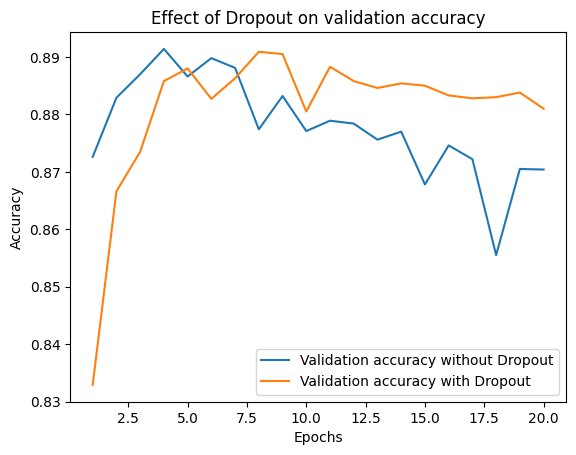

In [68]:
import matplotlib.pyplot as plt
val_no_droupout = history__without_dropout.history["val_accuracy"]
val_w_droupout = history_dropout.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_no_droupout,
         label="Validation accuracy without Dropout")
plt.plot(epochs, val_w_droupout,
         label="Validation accuracy with Dropout")
plt.title("Effect of Dropout on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Summary